In [ ]:
#2)COLLECT THE COMPLEXES DATA FROM THE API ENDPOINTS-
https://developer.sportradar.com/tennis/reference/complexes

In [1]:
import requests
#Set your API endpoint and key
url = "https://api.sportradar.com/tennis/trial/v3/en/complexes.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}
#Fetch the data
response = requests.get(url, headers=headers)

print(response.text)


{"generated_at":"2025-04-12T19:54:43+00:00","complexes":[{"id":"sr:complex:705","name":"Nacional","venues":[{"id":"sr:venue:70045","name":"Cancha Central","city_name":"Santiago","country_name":"Chile","country_code":"CHL","timezone":"America\/Santiago"}]},{"id":"sr:complex:1078","name":"Estadio de la Cartuja","venues":[{"id":"sr:venue:74856","name":"Centre Court","city_name":"Seville","country_name":"Spain","country_code":"ESP","timezone":"Europe\/Madrid"},{"id":"sr:venue:74858","name":"Court One","city_name":"Seville","country_name":"Spain","country_code":"ESP","timezone":"Europe\/Madrid"}]},{"id":"sr:complex:1495","name":"Sibur Arena","venues":[{"id":"sr:venue:1496","name":"COURT 1","city_name":"Saint Petersburg","country_name":"Russia","country_code":"RUS","timezone":"Europe\/Moscow"},{"id":"sr:venue:1500","name":"CENTER COURT","city_name":"Saint Petersburg","country_name":"Russia","country_code":"RUS","timezone":"Europe\/Moscow"},{"id":"sr:venue:62149","name":"Sibur Arena","city_na

In [2]:
data = [
    {"complexes": ["Complex A", "Complex B"]},
    {"complexes": ["Complex C"]}
]
data[-1]["complexes"] #It's a clean one-liner for accessing nested data. Very handy in real-time data processing, logging, or dynamic app updates.

#data[-1] --> Get the last item in the list ({"complexes": ["Complex C"]})
#["complexes"] --> Access the value of the "complexes" key from that dictionary --> which is ["Complex C"]


['Complex C']

In [3]:
import requests

# API Endpoint (make sure the trial API key is active)
url = "https://api.sportradar.com/tennis/trial/v3/en/complexes.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}

# Make request
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    
    # Lists to store the data
    complexes = []
    venues = []

    # Extract data
    for cmplx in data.get("complexes", []):
        complex_id = cmplx.get("id")
        complex_name = cmplx.get("name")

        # Append to complexes list
        complexes.append({
            "complex_id": complex_id,
            "complex_name": complex_name
        })

        # Loop through venues
        for venue in cmplx.get("venues", []):
            venues.append({
                "venue_id": venue.get("id"),
                "venue_name": venue.get("name"),
                "city_name": venue.get("city_name"),
                "country_name": venue.get("country_name"),
                "country_code": venue.get("country_code"),
                "timezone": venue.get("timezone"),
                "complex_id": complex_id  #Foreign key reference
            })

    # Display complexes
    print("\n--- Complexes ---")
    for c in complexes:
        print(c)

    # Display venues
    print("\n--- Venues ---")
    for v in venues:
        print(v)

else:
    print(f"Failed to fetch data: {response.status_code} - {response.text}")


--- Complexes ---
{'complex_id': 'sr:complex:705', 'complex_name': 'Nacional'}
{'complex_id': 'sr:complex:1078', 'complex_name': 'Estadio de la Cartuja'}
{'complex_id': 'sr:complex:1495', 'complex_name': 'Sibur Arena'}
{'complex_id': 'sr:complex:2375', 'complex_name': 'Complexo de Tenis do Jamor'}
{'complex_id': 'sr:complex:4032', 'complex_name': 'Shree Shiv Chhatrapati Sports Complex'}
{'complex_id': 'sr:complex:5520', 'complex_name': 'O2 Arena'}
{'complex_id': 'sr:complex:5526', 'complex_name': 'Ostravar Arena'}
{'complex_id': 'sr:complex:6310', 'complex_name': 'Varazdin Arena'}
{'complex_id': 'sr:complex:6484', 'complex_name': 'Arena Montpellier'}
{'complex_id': 'sr:complex:6736', 'complex_name': 'Arenes de Metz'}
{'complex_id': 'sr:complex:6888', 'complex_name': 'Palais des sports de Pau'}
{'complex_id': 'sr:complex:6890', 'complex_name': 'Palais des Sports Orleans'}
{'complex_id': 'sr:complex:6904', 'complex_name': 'Stade Pierre-de-Coubertin'}
{'complex_id': 'sr:complex:7048', 'c

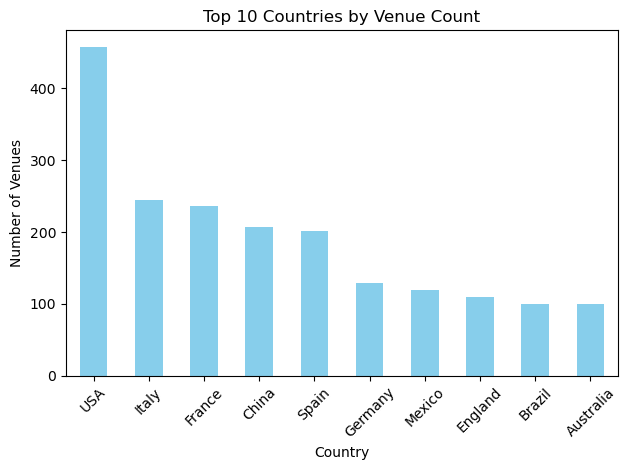

In [4]:
# Step:1(Optional) - Top Countries by Number of Venues — Bar Chart

import pandas as pd
import matplotlib.pyplot as plt

# Ensure you're converting the correct list into a DataFrame
venues_df = pd.DataFrame(venues)  # 'venues' should be the list of venue dictionaries

# Count venues per country
venue_counts = venues_df['country_name'].value_counts().head(10)

# Plot
venue_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Venue Count')
plt.xlabel('Country')
plt.ylabel('Number of Venues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Convert the extracted data into DataFrames
complexes_df = pd.DataFrame(complexes)
venues_df = pd.DataFrame(venues)

# Display the DataFrames
print("\n--- Complexes DataFrame ---")
print(complexes_df.head())

print("\n--- Venues DataFrame ---")
print(venues_df.head())


--- Complexes DataFrame ---
        complex_id                           complex_name
0   sr:complex:705                               Nacional
1  sr:complex:1078                  Estadio de la Cartuja
2  sr:complex:1495                            Sibur Arena
3  sr:complex:2375             Complexo de Tenis do Jamor
4  sr:complex:4032  Shree Shiv Chhatrapati Sports Complex

--- Venues DataFrame ---
         venue_id      venue_name         city_name country_name country_code  \
0  sr:venue:70045  Cancha Central          Santiago        Chile          CHL   
1  sr:venue:74856    Centre Court           Seville        Spain          ESP   
2  sr:venue:74858       Court One           Seville        Spain          ESP   
3   sr:venue:1496         COURT 1  Saint Petersburg       Russia          RUS   
4   sr:venue:1500    CENTER COURT  Saint Petersburg       Russia          RUS   

           timezone       complex_id  
0  America/Santiago   sr:complex:705  
1     Europe/Madrid  sr:complex:

In [6]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",  
    user="root", 
    password="",  
    database="sportanalytics",
    port = 3314 
)

In [7]:
# Establishing the connection
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS complex (
    complex_id VARCHAR(50),
    complex_name VARCHAR(100)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS venue (
    venue_id VARCHAR(50),
    venue_name VARCHAR(100),
    city_name VARCHAR(50),
    country_name VARCHAR(100),
    country_code VARCHAR(5),
    timezone VARCHAR(100),
    complex_id VARCHAR(50)
);
''')

# Insert data into complex table
for index, row in complexes_df.iterrows():
    cursor.execute('''
    INSERT INTO complex (complex_id, complex_name)
    VALUES (%s, %s);
    ''', (row['complex_id'], row['complex_name']))

# Insert data into venue table
for index, row in venues_df.iterrows():
    cursor.execute('''
    INSERT INTO venue (venue_id, venue_name, city_name, country_name, country_code, timezone, complex_id)
    VALUES (%s, %s, %s, %s, %s, %s, %s);
    ''', (row['venue_id'], row['venue_name'], row['city_name'], row['country_name'], row['country_code'], row['timezone'], row['complex_id']))

#Commit changes and close the connection
conn.commit()
cursor.close()
conn.close()

print("Data has been inserted into MySQL!")

Data has been inserted into MySQL!


In [8]:
from tabulate import tabulate

In [9]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port = 3314
)
cursor = conn.cursor()

In [10]:
#1) List all venues along with their associated complex name
cursor.execute(
    '''SELECT v.venue_name, c.complex_name 
FROM venue v 
JOIN complex c ON v.complex_id = c.complex_id limit 100;
    '''             
)
results = cursor.fetchall()
headers = ["venue_name", "complex_name"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+----------------+----------------------------+
| venue_name     | complex_name               |
+================+============================+
| Cancha Central | Nacional                   |
+----------------+----------------------------+
| Cancha Central | Nacional                   |
+----------------+----------------------------+
| Cancha Central | Nacional                   |
+----------------+----------------------------+
| Centre Court   | Estadio de la Cartuja      |
+----------------+----------------------------+
| Centre Court   | Estadio de la Cartuja      |
+----------------+----------------------------+
| Centre Court   | Estadio de la Cartuja      |
+----------------+----------------------------+
| Centre Court   | Estadio de la Cartuja      |
+----------------+----------------------------+
| Court One      | Estadio de la Cartuja      |
+----------------+----------------------------+
| Court One      | Estadio de la Cartuja      |
+----------------+----------------------

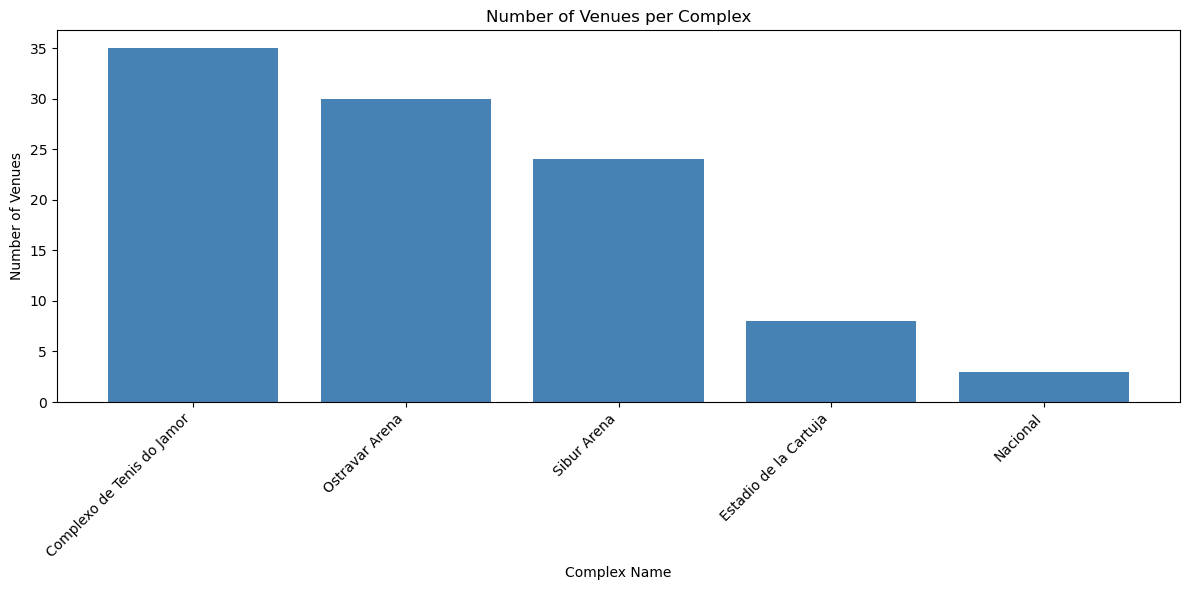

In [11]:
#Optional: List all venues along with their associated complex name
#Step 1: Convert results to DataFrame
df = pd.DataFrame(results, columns=["venue_name", "complex_name"])

#Step 2: Count how many venues are associated with each complex
venue_counts = df["complex_name"].value_counts().reset_index()
venue_counts.columns = ["complex_name", "venue_count"]

#Step 3: Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(venue_counts["complex_name"], venue_counts["venue_count"], color='steelblue')
plt.title("Number of Venues per Complex")
plt.xlabel("Complex Name")
plt.ylabel("Number of Venues")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
#2)Count the number of venues in each complex
cursor.execute(
    '''SELECT count(v.venue_name) as count_venue, c.complex_name 
FROM venue v 
JOIN complex c ON v.complex_id = c.complex_id
group by c.complex_name;
    '''             
)
results = cursor.fetchall()
headers = ["count_venue", "complex_name"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+---------------+------------------------------------------------------------+
|   count_venue | complex_name                                               |
+===============+============================================================+
|           180 | A.S.D. Tennis Club Como                                    |
+---------------+------------------------------------------------------------+
|           264 | AAJB Tennis                                                |
+---------------+------------------------------------------------------------+
|           112 | Abama Tennis Academy                                       |
+---------------+------------------------------------------------------------+
|           112 | Academy Zhangjiagang                                       |
+---------------+------------------------------------------------------------+
|            24 | Acapulco Princess Mundo Imperial                           |
+---------------+-----------------------------------

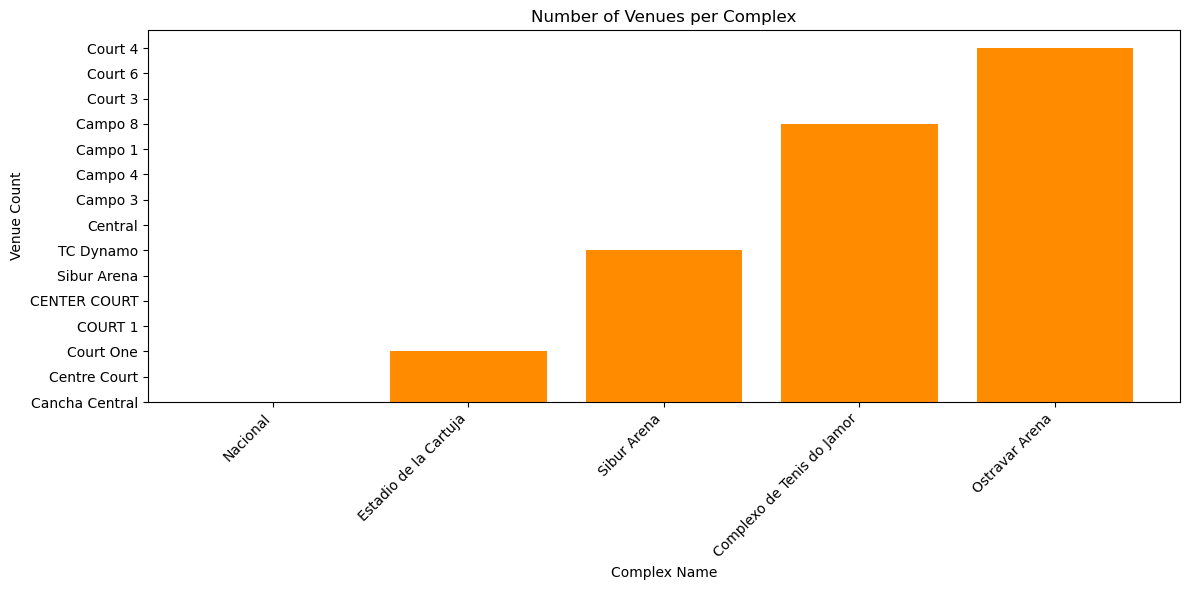

In [12]:
#Optional: 2)Count the number of venues in each complex

#Step 1: Convert results to DataFrame
df = pd.DataFrame(results, columns=["count_venue", "complex_name"])

#Step 2: Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df["complex_name"], df["count_venue"], color='darkorange')
plt.title("Number of Venues per Complex")
plt.xlabel("Complex Name")
plt.ylabel("Venue Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
#3)Get details of venues in a specific country (e.g., Chile)

cursor.execute(
    '''SELECT * 
FROM venue 
WHERE country_name = 'Chile';
    '''             
)
results = cursor.fetchall()
headers = [""]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+----------------+-------------------------+--------------+-------+-----+------------------+------------------+
|                |                         |              |       |     |                  |                  |
+================+=========================+==============+=======+=====+==================+==================+
| sr:venue:70045 | Cancha Central          | Santiago     | Chile | CHL | America/Santiago | sr:complex:705   |
+----------------+-------------------------+--------------+-------+-----+------------------+------------------+
| sr:venue:67857 | Cancha Central          | Temuco       | Chile | CHL | America/Santiago | sr:complex:11769 |
+----------------+-------------------------+--------------+-------+-----+------------------+------------------+
| sr:venue:67859 | Cancha 1                | Temuco       | Chile | CHL | America/Santiago | sr:complex:11769 |
+----------------+-------------------------+--------------+-------+-----+------------------+------------

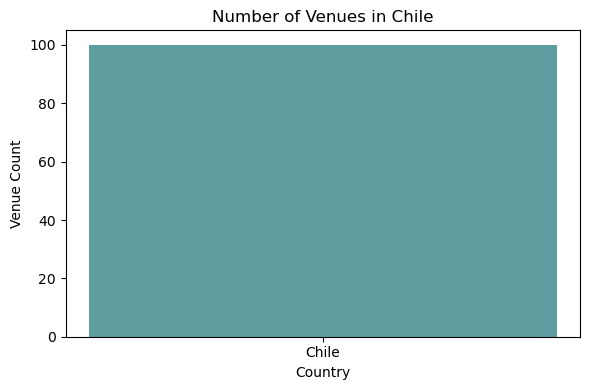

In [16]:
#Optional: 3)Get details of venues in a specific country (e.g., Chile)

#Convert results to DataFrame
df = pd.DataFrame(results, columns=["venue_name", "country_name"])

#If we just need the count of venues:
venue_count = df.shape[0]

# Plot the bar graph for the number of venues in Chile
plt.figure(figsize=(6, 4))
plt.bar(["Chile"], [venue_count], color='cadetblue')
plt.title("Number of Venues in Chile")
plt.xlabel("Country")
plt.ylabel("Venue Count")
plt.tight_layout()
plt.show()

In [23]:
#4)Identify all venues and their timezones

cursor.execute(
    '''SELECT venue_name, timezone 
FROM venue;
    '''             
)
results = cursor.fetchall()
headers = ["venue_name", "timezone"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+------------------------------------------------------------+--------------------------------+
| venue_name                                                 | timezone                       |
+============================================================+================================+
| Cancha Central                                             | America/Santiago               |
+------------------------------------------------------------+--------------------------------+
| Centre Court                                               | Europe/Madrid                  |
+------------------------------------------------------------+--------------------------------+
| Court One                                                  | Europe/Madrid                  |
+------------------------------------------------------------+--------------------------------+
| COURT 1                                                    | Europe/Moscow                  |
+---------------------------------------

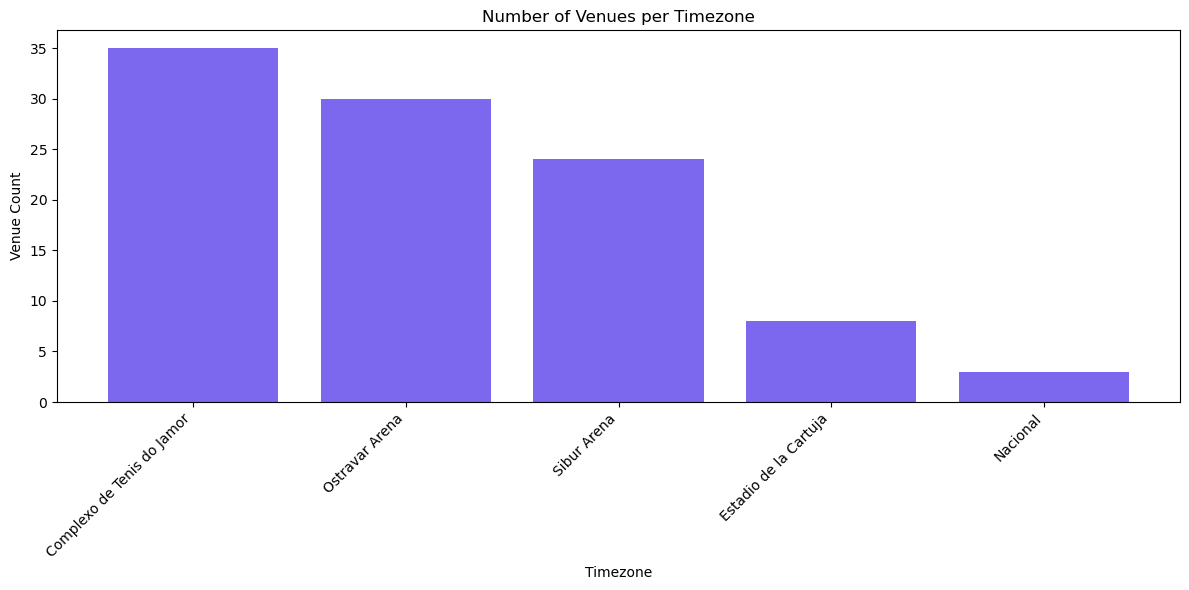

In [17]:
#Optional: 4)Identify all venues and their timezones

#Step 1: Convert the results into a DataFrame
df = pd.DataFrame(results, columns=["venue_name", "timezone"])

#Step 2: Count how many venues exist in each timezone
timezone_counts = df["timezone"].value_counts().reset_index()
timezone_counts.columns = ["timezone", "venue_count"]

#Step 3: Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(timezone_counts["timezone"], timezone_counts["venue_count"], color='mediumslateblue')
plt.title("Number of Venues per Timezone")
plt.xlabel("Timezone")
plt.ylabel("Venue Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
#5)Find complexes that have more than one venue

cursor.execute(
    '''select count(venue_id) as cnt,complex_name from complex a join venue b on a.complex_id = b.complex_id
group by complex_name
having cnt >1

    '''             
)
results = cursor.fetchall()
headers = ["cnt", "complex_name"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+-------+------------------------------------------------------------+
|   cnt | complex_name                                               |
+=======+============================================================+
|   180 | A.S.D. Tennis Club Como                                    |
+-------+------------------------------------------------------------+
|   264 | AAJB Tennis                                                |
+-------+------------------------------------------------------------+
|   112 | Abama Tennis Academy                                       |
+-------+------------------------------------------------------------+
|   112 | Academy Zhangjiagang                                       |
+-------+------------------------------------------------------------+
|    24 | Acapulco Princess Mundo Imperial                           |
+-------+------------------------------------------------------------+
|    24 | Accor Arena                                                |
+-----

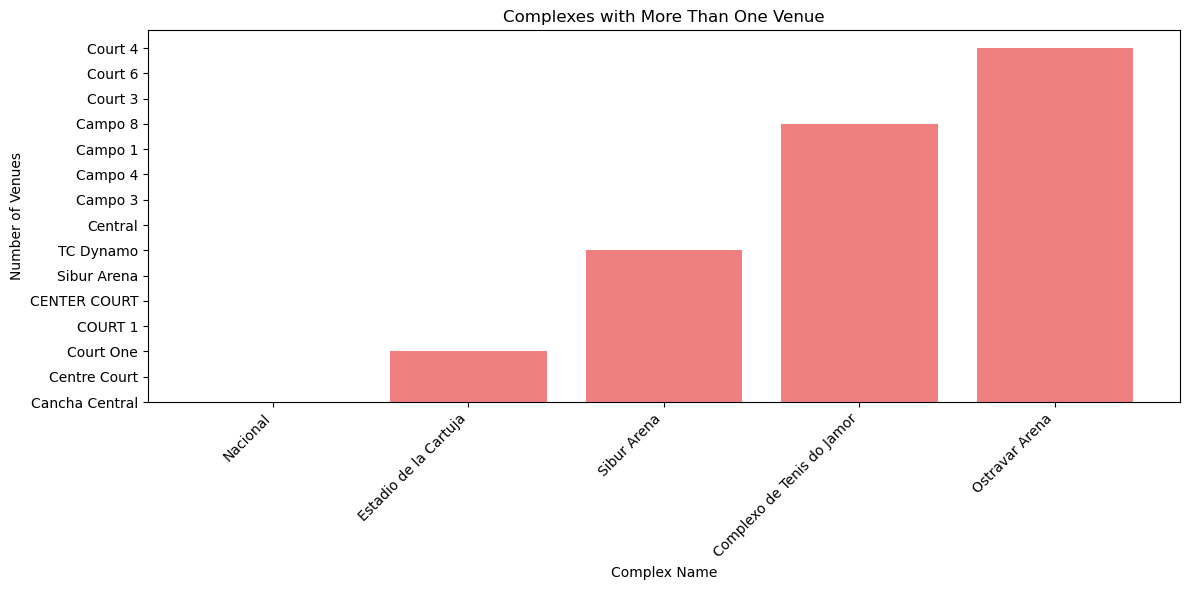

In [18]:
#Optional: 5)Find complexes that have more than one venue
#Step 1: Convert results to DataFrame
df = pd.DataFrame(results, columns=["cnt", "complex_name"])

# Step 2: Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df["complex_name"], df["cnt"], color='lightcoral')
plt.title("Complexes with More Than One Venue")
plt.xlabel("Complex Name")
plt.ylabel("Number of Venues")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
#6)List venues grouped by country

cursor.execute(
    '''select venue_name,country_name from venue group by 1,2

    '''             
)
results = cursor.fetchall()
headers = ["venue_name", "country_name"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+------------------------------------------------------------+----------------------+
| venue_name                                                 | country_name         |
+============================================================+======================+
| 12BET COURT                                                | England              |
+------------------------------------------------------------+----------------------+
| 1573 Arena                                                 | Australia            |
+------------------------------------------------------------+----------------------+
| Abierto Akron Zapopan                                      | Mexico               |
+------------------------------------------------------------+----------------------+
| Acqua Maniva                                               | Italy                |
+------------------------------------------------------------+----------------------+
| ADCB Court 1                                        

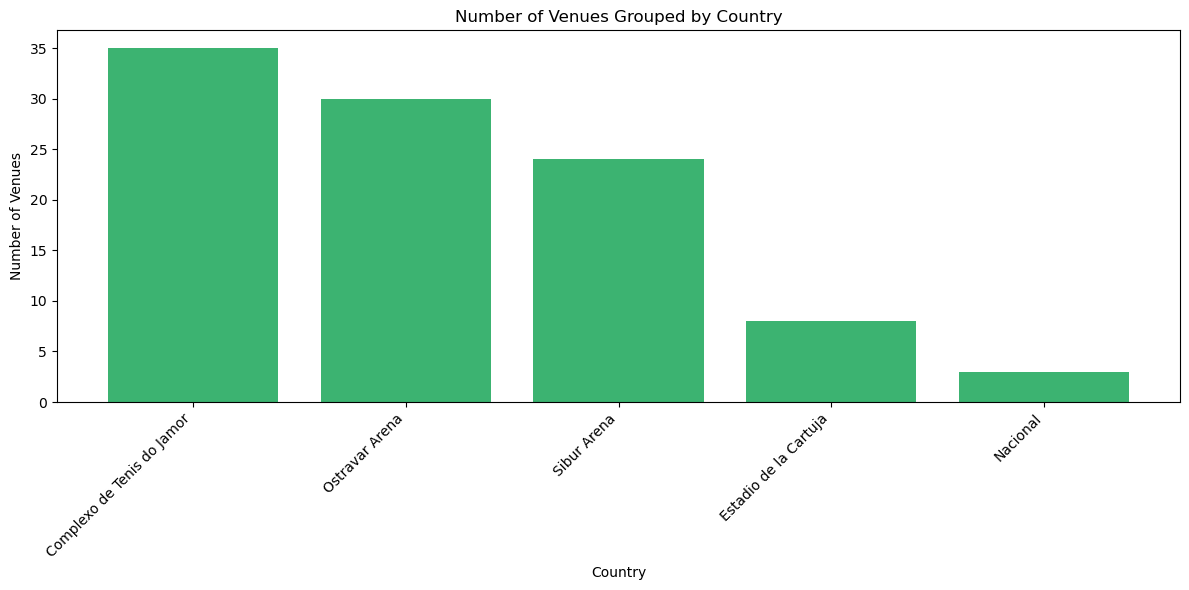

In [20]:
#Optional:6)List venues grouped by country

#Step 1: Convert the results into a DataFrame
df = pd.DataFrame(results, columns=["venue_name", "country_name"])

#Step 2: Count the number of venues in each country
country_venue_count = df["country_name"].value_counts().reset_index()
country_venue_count.columns = ["country_name", "venue_count"]

#Step 3: Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(country_venue_count["country_name"], country_venue_count["venue_count"], color='mediumseagreen')
plt.title("Number of Venues Grouped by Country")
plt.xlabel("Country")
plt.ylabel("Number of Venues")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
#7)Find all venues for a specific complex (e.g., Nacional)
cursor.execute(
    '''SELECT v.venue_name,v.venue_id
FROM venue v 
JOIN complex c ON v.complex_id = c.complex_id 
WHERE c.complex_name = 'Nacional';
    '''             
)
results = cursor.fetchall()
headers = ["venue_name", "venue_id"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+----------------+----------------+
| venue_name     | venue_id       |
+================+================+
| Cancha Central | sr:venue:70045 |
+----------------+----------------+
| Cancha Central | sr:venue:70045 |
+----------------+----------------+
| Cancha Central | sr:venue:70045 |
+----------------+----------------+
| Cancha Central | sr:venue:70045 |
+----------------+----------------+


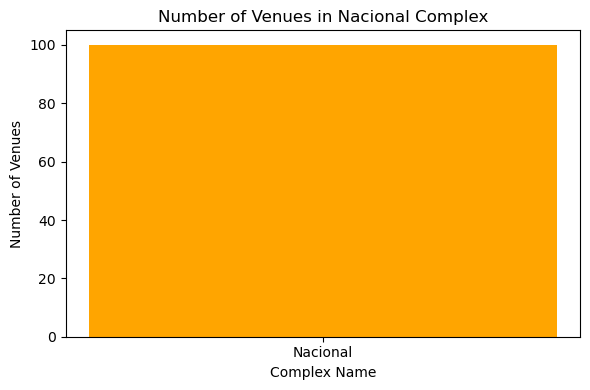

In [21]:
#Optional: 7)Find all venues for a specific complex (e.g., Nacional)

#Step 1: Convert the results into a DataFrame
df = pd.DataFrame(results, columns=["venue_name", "venue_id"])

#Step 2: Count the number of venues for the complex "Nacional"
venue_count = df.shape[0]

#Step 3: Plot the bar graph for venues in the "Nacional" complex
plt.figure(figsize=(6, 4))
plt.bar(["Nacional"], [venue_count], color='orange')
plt.title("Number of Venues in Nacional Complex")
plt.xlabel("Complex Name")
plt.ylabel("Number of Venues")
plt.tight_layout()
plt.show()